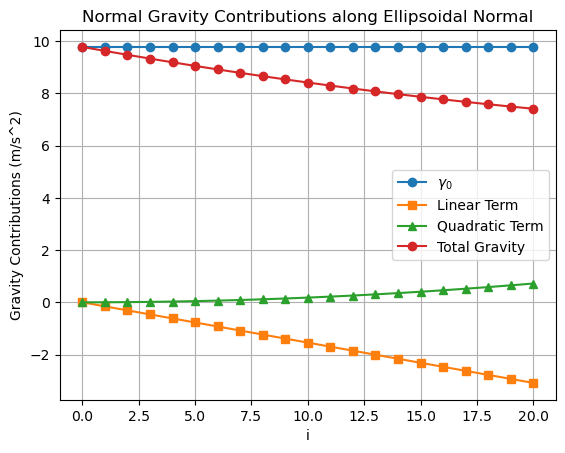

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gravity_contributions():
    # Parameters
    phi = 9  # latitude in degrees
    delta_h = 50  # height increment in meters
    i_values = np.arange(0, 21)  # values of i

    # Initialize arrays to store contributions
    gamma0_contributions = np.zeros_like(i_values, dtype=float)
    linear_term_contributions = np.zeros_like(i_values, dtype=float)
    quadratic_term_contributions = np.zeros_like(i_values, dtype=float)

    # Compute contributions for each i
    for i in i_values:
        hi = i * delta_h
        gamma0, linear_term, quadratic_term = compute_gravity_contributions(phi, hi)

        # Store contributions
        gamma0_contributions[i] = gamma0
        linear_term_contributions[i] = linear_term
        quadratic_term_contributions[i] = quadratic_term

    # Plot contributions
    plt.figure()
    plt.plot(i_values, gamma0_contributions, 'o-', label=r'$\gamma_0$')
    plt.plot(i_values, linear_term_contributions, 's-', label='Linear Term')
    plt.plot(i_values, quadratic_term_contributions, '^-', label='Quadratic Term')
    plt.plot(i_values, gamma0_contributions + linear_term_contributions + quadratic_term_contributions, 'o-', label='Total Gravity')

    # Customize the plot
    plt.xlabel('i')
    plt.ylabel('Gravity Contributions (m/s^2)')
    plt.title('Normal Gravity Contributions along Ellipsoidal Normal')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.savefig('task1a.png')
    plt.show()

def compute_gravity_contributions(phi, h):
    # Ellipsoid parameters for GRS80
    a = 6378137.0  # semi-major axis in meters
    b = 6356752.3141  # semi-minor axis in meters
    geq = 9.7803267714  # normal gravity at the equator in m/s^2
    gpo = 9.8321863685  # normal gravity at the pole in m/s^2

    # Latitude in radians
    phi_rad = np.deg2rad(phi)

    # Somigliana's formula for gamma0
    gamma0 = (a * geq * np.cos(phi_rad)**2 + b * gpo * np.sin(phi_rad)**2) / np.sqrt(a**2 * np.cos(phi_rad)**2 + b**2 * np.sin(phi_rad)**2)

    # Linear and quadratic terms
    linear_term = -(3.0877e-3 - 4.3e-6 * np.sin(phi_rad)**2) * h
    quadratic_term = 0.72e-6 * h**2

    return gamma0, linear_term, quadratic_term

# Call the main plotting function
plot_gravity_contributions()

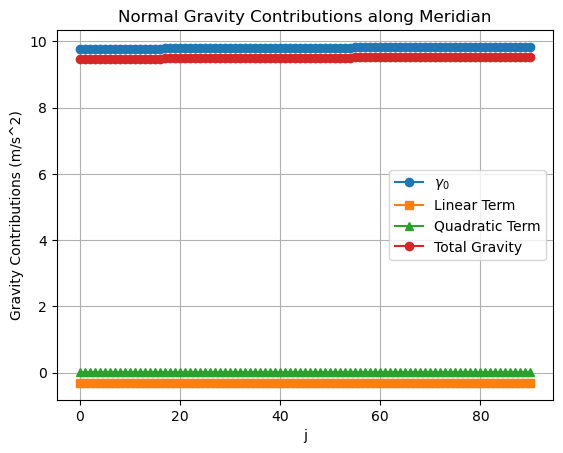

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gravity_contributions_meridian():
    # Parameters
    delta_phi = 1  # latitude increment in degrees
    h = 100  # constant ellipsoidal height in meters
    j_values = np.arange(0, 91)  # values of j

    # Initialize arrays to store contributions
    gamma0_contributions = np.zeros_like(j_values, dtype=float)
    linear_term_contributions = np.zeros_like(j_values, dtype=float)
    quadratic_term_contributions = np.zeros_like(j_values, dtype=float)

    # Compute contributions for each j
    for j in j_values:
        phi_j = j * delta_phi
        gamma0, linear_term, quadratic_term = compute_gravity_contributions(phi_j, h)

        # Store contributions
        gamma0_contributions[j] = gamma0
        linear_term_contributions[j] = linear_term
        quadratic_term_contributions[j] = quadratic_term

    # Plot contributions
    plt.figure()
    plt.plot(j_values, gamma0_contributions, 'o-', label=r'$\gamma_0$')
    plt.plot(j_values, linear_term_contributions, 's-', label='Linear Term')
    plt.plot(j_values, quadratic_term_contributions, '^-', label='Quadratic Term')
    plt.plot(j_values, gamma0_contributions + linear_term_contributions + quadratic_term_contributions, 'o-', label='Total Gravity')

    # Customize the plot
    plt.xlabel('j')
    plt.ylabel('Gravity Contributions (m/s^2)')
    plt.title('Normal Gravity Contributions along Meridian')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.savefig('task1b.png')
    plt.show()

def compute_gravity_contributions(phi, h):
    # Ellipsoid parameters for GRS80
    a = 6378137.0  # semi-major axis in meters
    b = 6356752.3141  # semi-minor axis in meters
    geq = 9.7803267714  # normal gravity at the equator in m/s^2
    gpo = 9.8321863685  # normal gravity at the pole in m/s^2

    # Latitude in radians
    phi_rad = np.deg2rad(phi)

    # Somigliana's formula for gamma0
    gamma0 = (a * geq * np.cos(phi_rad)**2 + b * gpo * np.sin(phi_rad)**2) / np.sqrt(a**2 * np.cos(phi_rad)**2 + b**2 * np.sin(phi_rad)**2)

    # Linear and quadratic terms
    linear_term = -(3.0877e-3 - 4.3e-6 * np.sin(phi_rad)**2) * h
    quadratic_term = 0.72e-6 * h**2

    return gamma0, linear_term, quadratic_term

# Call the main plotting function
plot_gravity_contributions_meridian()

## With Cuve fitting

In [2]:
def Normalgravity(phi, h):
    # normal gravity at the equator
    gammaa = 9.7803267715
    gamma0 = gammaa * (1 + 0.0052790414 * ((np.sin(phi))**2) + 0.0000232718 * ((np.sin(phi))**4) + 0.0000001262 * ((np.sin(phi))**6) + 0.0000000007 * ((np.sin(phi))**8))

    # The normal gravity at the ellipsoidal height h
    gamma = gamma0 - (0.0030877 - 0.0000043 * ((np.sin(phi))**2)) * h + 0.00000072 * h * h
    return gamma0, gamma

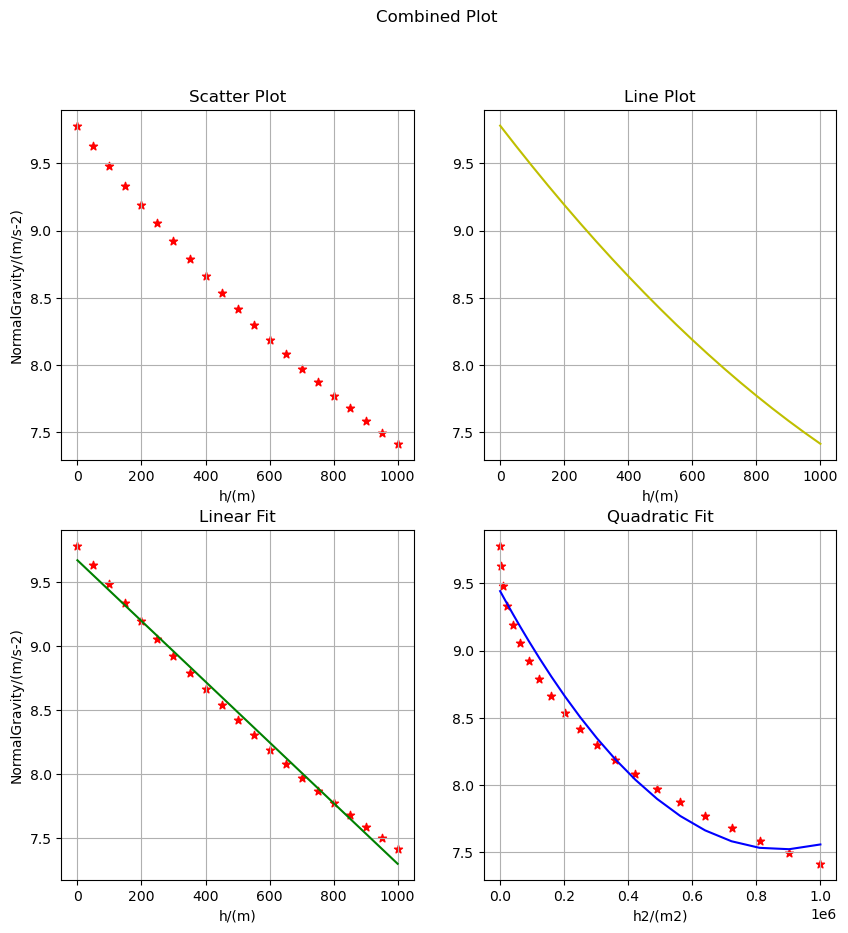

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1a
phi1 = 9 * np.pi / 180
h1 = np.arange(0, 1001, 50)
normalgravity_10 = np.zeros(21)
normalgravity_1 = np.zeros(21)

for i in range(21):
    normalgravity_10[i], normalgravity_1[i] = Normalgravity(phi1, h1[i])

plt.figure(figsize=(10, 10))

# Scatter plot
plt.subplot(2, 2, 1)
plt.scatter(h1, normalgravity_1, color='r', marker='*')
plt.title('Scatter Plot')
plt.xlabel("h/(m)")
plt.ylabel("NormalGravity/(m/s-2)")
plt.grid(True)

# Line plot
plt.subplot(2, 2, 2)
plt.plot(h1, normalgravity_1, color='y')
plt.title('Line Plot')
plt.xlabel('h/(m)')
# plt.ylabel('NormalGravity/(m/s-2)')
plt.grid(True)

# Linear fit with h
plt.subplot(2, 2, 3)
p_linear = np.polyfit(h1, normalgravity_1, 1)
y_linear_fit = np.polyval(p_linear, h1)
plt.scatter(h1, normalgravity_1, color='r', marker='*')
plt.plot(h1, y_linear_fit, color='g')
plt.title('Linear Fit')
plt.xlabel('h/(m)')
plt.ylabel('NormalGravity/(m/s-2)')
plt.grid(True)

# Quadratic fit with h^2
plt.subplot(2, 2, 4)
plt.scatter(h1 * h1, normalgravity_1, color='r', marker='*')
p_quadratic = np.polyfit(h1 * h1, normalgravity_1, 2)
y_quadratic_fit = np.polyval(p_quadratic, h1 * h1)
plt.plot(h1 * h1, y_quadratic_fit, color='b')
plt.title('Quadratic Fit')
plt.xlabel('h2/(m2)')
# plt.ylabel('NormalGravity/(m/s-2)')
plt.grid(True)

plt.suptitle('Combined Plot')
# Show the plots
plt.show()

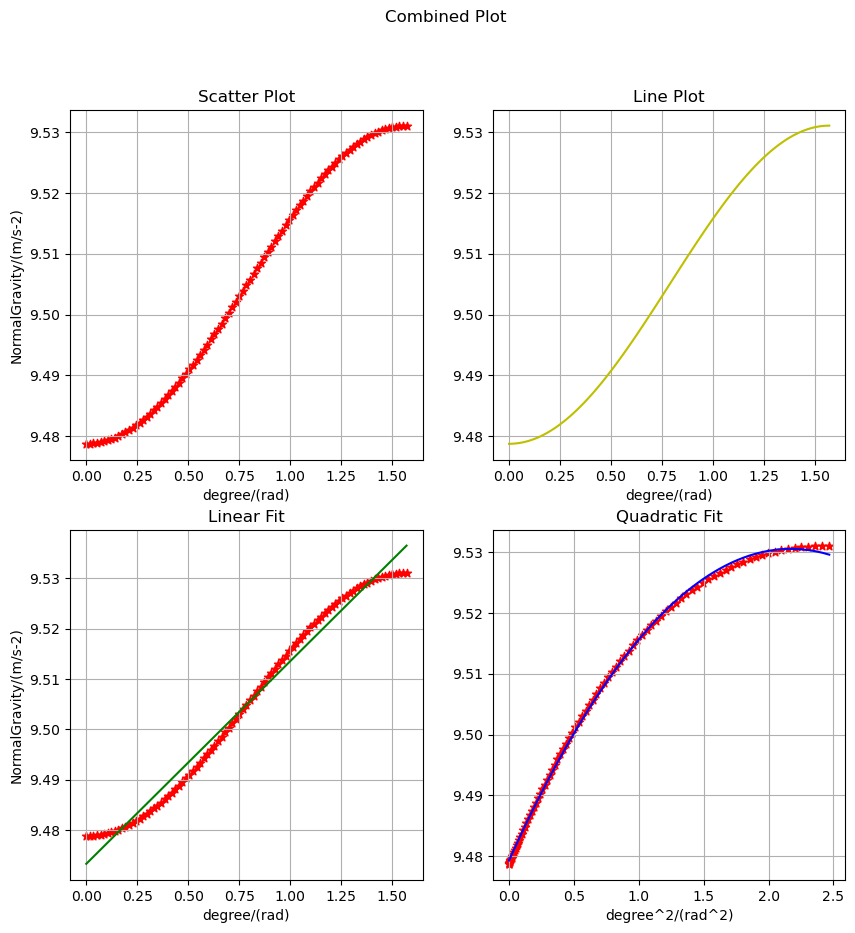

In [16]:
# Task 1b
h2 = 100
phi20 = np.arange(0, 91, 1)
phi2 = phi20 * np.pi / 180
normalgravity_20 = np.zeros(91)
normalgravity_2 = np.zeros(91)

for j in range(91):
    normalgravity_20[j], normalgravity_2[j] = Normalgravity(phi2[j], h2)

# Scatter plot
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(phi2, normalgravity_2, color='r', marker='*')
plt.title('Scatter Plot')
plt.xlabel("degree/(rad)")
plt.ylabel("NormalGravity/(m/s-2)")
plt.grid(True)

# Line plot
plt.subplot(2, 2, 2)
plt.plot(phi2, normalgravity_2, color='y')
plt.title('Line Plot')
plt.xlabel("degree/(rad)")
# plt.ylabel("NormalGravity/(m/s-2)")
plt.grid(True)

# Linear fit with h
plt.subplot(2, 2, 3)
p_linear = np.polyfit(phi2, normalgravity_2, 1)
y_linear_fit = np.polyval(p_linear, phi2)
plt.scatter(phi2, normalgravity_2, color='r', marker='*')
plt.plot(phi2, y_linear_fit, color='g')
plt.title('Linear Fit')
plt.xlabel("degree/(rad)")
plt.ylabel('NormalGravity/(m/s-2)')
plt.grid(True)

# Quadratic fit with h^2
plt.subplot(2, 2, 4)
plt.scatter(phi2 * phi2, normalgravity_2, color='r', marker='*')
p_quadratic = np.polyfit(phi2 * phi2, normalgravity_2, 2)
y_quadratic_fit = np.polyval(p_quadratic, phi2 * phi2)
plt.plot(phi2 * phi2, y_quadratic_fit, color='b')
plt.title('Quadratic Fit')
plt.xlabel("degree^2/(rad^2)")
# plt.ylabel('NormalGravity/(m/s-2)')
plt.grid(True)

plt.suptitle('Combined Plot')

# Show the plots
plt.show()